In [1]:
import pandas as pd

def load_housing_data():
    csv_path="datasets/housing/housing.csv"
    return pd.read_csv(csv_path)
housing = load_housing_data()

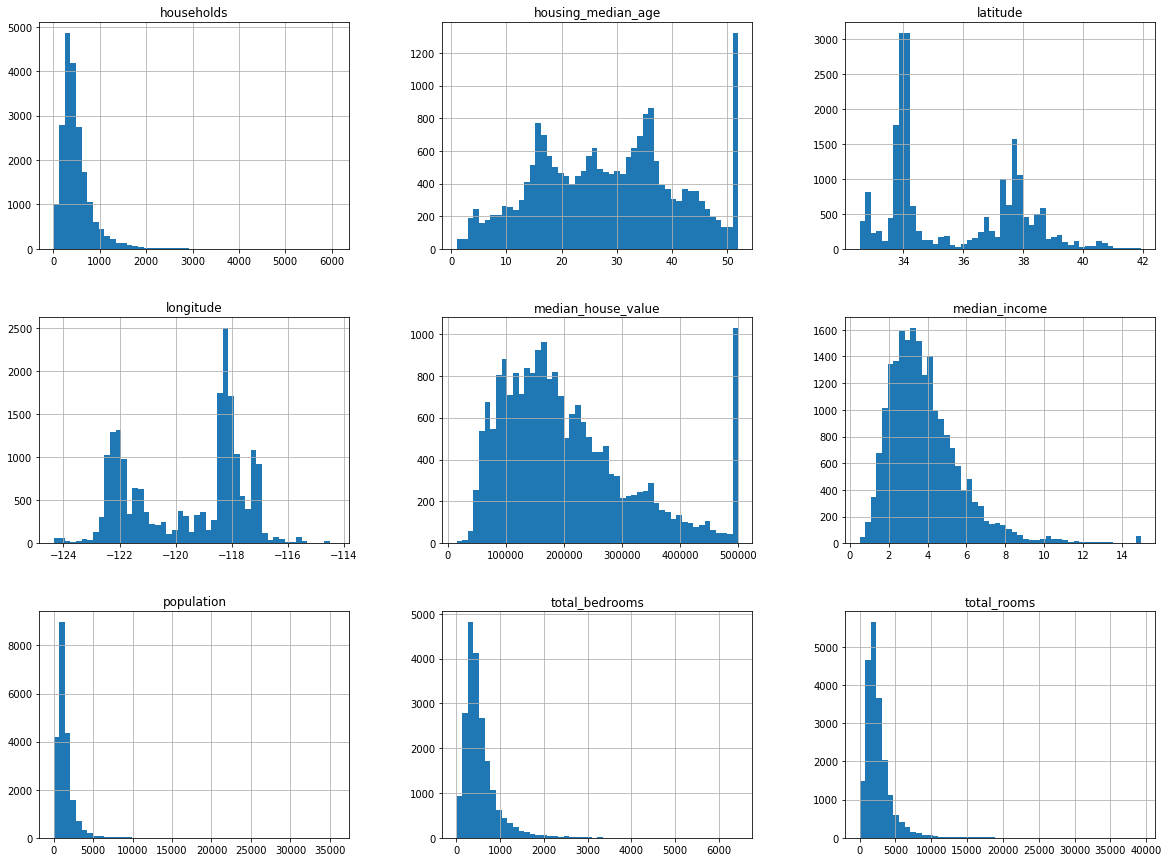

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
housing.count()

longitude             20640
latitude              20640
housing_median_age    20640
total_rooms           20640
total_bedrooms        20433
population            20640
households            20640
median_income         20640
median_house_value    20640
ocean_proximity       20640
dtype: int64

In [8]:
import numpy as np
housing["income_cat"] =np.ceil(housing["median_income"]/1.5)
housing["income_cat"].where(housing["income_cat"]<5,5.0,inplace=True)

In [9]:
def create_train_set():
    from sklearn.model_selection import StratifiedShuffleSplit as sss
    split=sss(n_splits=1, test_size=0.2, random_state=42)
    for train_index, test_index in split.split(housing, housing["income_cat"]):
        strain_train_set = housing.loc[train_index]
        strain_test_set = housing.loc[test_index]
        return strain_train_set, strain_test_set

In [10]:
strain_train_set, strain_test_set = create_train_set()

In [11]:
housing["income_cat"].value_counts()/len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [12]:
strain_test_set["income_cat"].value_counts()/len(strain_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [13]:
for set_ in (strain_train_set, strain_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [14]:
housing = strain_train_set.copy()

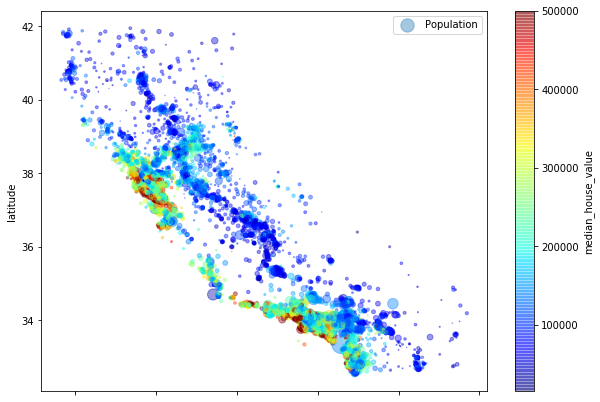

In [15]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=housing["population"]/100, label="Population", figsize=(10,7)
            , c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

In [16]:
corr_matrix = housing.corr()

In [17]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [18]:
corr_matrix["median_house_value"].abs().sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
latitude              0.142724
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
longitude             0.047432
population            0.026920
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fce9aba56a0>,
      dtype=object)

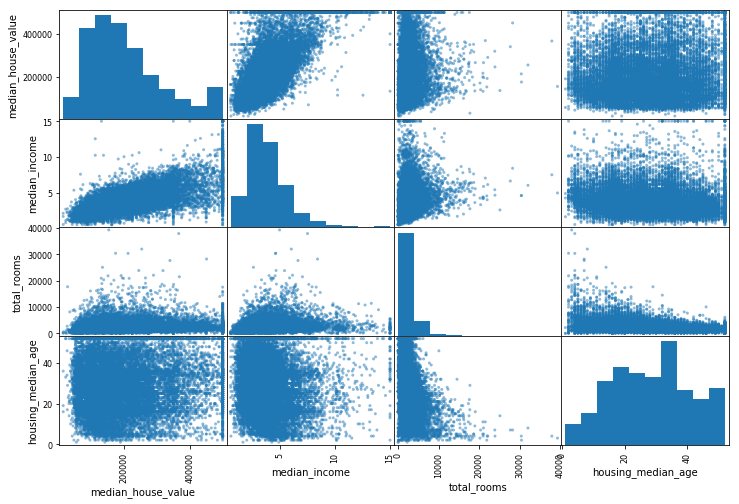

In [19]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))

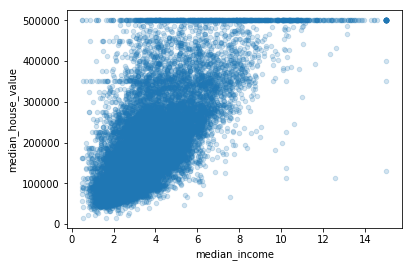

In [20]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.2)

In [21]:
housing["rooms_per_household"]= housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"]= housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]= housing["population"]/housing["households"]



In [22]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].abs().sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
bedrooms_per_room           0.259984
rooms_per_household         0.146285
latitude                    0.142724
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
longitude                   0.047432
population                  0.026920
population_per_household    0.021985
Name: median_house_value, dtype: float64

# Data Cleaning 

In [23]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,4.225108,0.241291,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,5.232295,0.200866,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,4.505810,0.231341,3.047847


In [24]:


def data_cleaning(df):
    from sklearn.preprocessing import Imputer, LabelBinarizer
    
    #Data Cleaning for numbers
    imputer = Imputer(strategy="median")
    dfn = df.drop("ocean_proximity", axis=1)
    imputer.fit(dfn)
    Xn=pd.DataFrame(imputer.transform(dfn),columns=dfn.columns)
    
    #Data Cleaning for Text and Categorical Attributes
    encoder = LabelBinarizer(sparse_output=True)
    Xt = encoder.fit_transform(df["ocean_proximity"])
    
    return imputer.statistics_,Xn,Xt

stats, X, Xt=data_cleaning(housing)

/home/puneetkucheria/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [25]:
stats

array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.11950000e+03,
        4.33000000e+02,  1.16400000e+03,  4.08000000e+02,  3.54090000e+00,
        1.79500000e+05,  5.23228423e+00,  2.03031374e-01,  2.81765270e+00])

In [26]:
housing.drop("ocean_proximity", axis=1).median().values

array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.11950000e+03,
        4.33000000e+02,  1.16400000e+03,  4.08000000e+02,  3.54090000e+00,
        1.79500000e+05,  5.23228423e+00,  2.03031374e-01,  2.81765270e+00])

In [27]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,4.625369,0.223852,2.094395
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,6.008850,0.159057,2.707965
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,4.225108,0.241291,2.025974
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,5.232295,0.200866,4.135977
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,4.505810,0.231341,3.047847


In [28]:
Xt

<16512x5 sparse matrix of type '<class 'numpy.int64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [29]:
Xt.__dict__

{'_shape': (16512, 5),
 'maxprint': 50,
 'indices': array([0, 0, 4, ..., 1, 0, 3], dtype=int32),
 'indptr': array([    0,     1,     2, ..., 16510, 16511, 16512], dtype=int32),
 'data': array([1, 1, 1, ..., 1, 1, 1])}

In [30]:
Xt

<16512x5 sparse matrix of type '<class 'numpy.int64'>'
	with 16512 stored elements in Compressed Sparse Row format>